# 高斯陷波滤波器

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [2]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [12]:
'''
% 高斯陷波滤波器
% input:
%     M,N:频域滤波器的尺寸
%     u0,v0：频率阻止点
%     D0：带阻滤波器的截止频率
% output:
%       H：M x N的矩阵，表示频域滤波器矩阵，数据类型为double
'''
def freqfilter_gaussian_sink_kernel(M,N,u0,v0,D0):
    u = np.arange(-M // 2,M // 2)
    v = np.arange(-N // 2,N // 2)
    U,V = np.meshgrid(u,v)
    D = np.sqrt(U ** 2 + V ** 2)
    D1 = np.sqrt((U - u0) ** 2 + (V - v0) ** 2)
    D2 = np.sqrt((V + v0) ** 2 + (V + v0) ** 2)
    
    H = 1.0 - np.exp(-(1 / 2) * (D1 * D2) / (D0 ** 2))
    return H

In [4]:
'''
% 频域滤波
% 函数输入：
%       X：输入的空域图像矩阵，double类型
%       H，频域滤波器，一般为图像X的2倍时较好
% 函数输出：
%       Z：输出的空域图像局长呢，数据类型为double类型
 % 二维傅里叶变换
'''
def fftfilt2(X,H):
    F = np.fft.fft2(X)
    Z = H * F
    Z = np.fft.ifftshift(Z)
    Z = np.abs(np.fft.ifft2(Z))
    return np.abs(Z)

In [5]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [6]:
src = cv2.cvtColor(cv2.imread('../../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [9]:
D0 = 4; # 阻止的频率点与频域中心的距离
u0 = 50;
v0 = 3;

In [10]:
rows,cols = gray.shape

In [15]:
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255

src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [16]:
r = fftfilt2(src[:,:,0].astype(np.float32) / 255.0,H)
g = fftfilt2(src[:,:,1].astype(np.float32) / 255.0,H)
b = fftfilt2(src[:,:,2].astype(np.float32) / 255.0,H)

In [17]:
dst = cv2.merge([r,g,b])
dst = dst * 255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

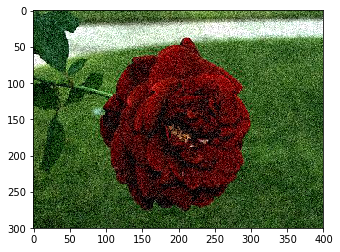

In [18]:
plt.imshow(src_noise)

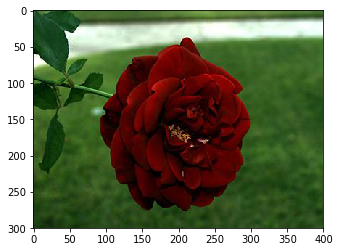

In [19]:
plt.imshow(dst)